# Ejercicio en clase

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import corner

np.random.seed(4)

1.- Usa tu código de metropolis para encontrar la pendiente y ordenada al órigen del conjunto de datos en el archivo fit_excercise.npy. El archivo son 3 arreglos que corresponden a x,y,yerror.

In [4]:
file = np.load('fit_ejercise.npy')

In [5]:
x = file[0]
y = file[1]
yerror = file[2]

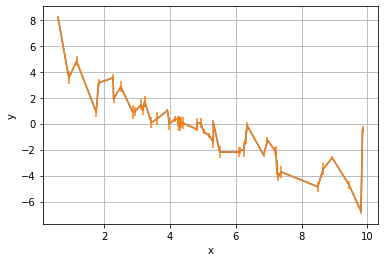

In [6]:
plt.plot(x, y)
plt.errorbar(x, y,yerr = yerror, markersize = 0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('True')

In [7]:
def function(x0, a0, b0):
    return a0*x0 + b0

def likelihood(a, b, data):
    equis = data[0]
    ye = data[1]
    yerr = data[2] 
    model = function(equis, a, b)
    likelihood_0 = (ye-model)**2/(yerr**2)
    return likelihood_0.sum()

In [8]:
rango = 3000

a0 = -3
b0 = 4
lnlike0 = -1*likelihood(a0, b0, [x,y,yerror])

a_sample = [a0]
b_sample = [b0]

sigma = 0.01

for j in range(1,rango):
    a_new = np.random.normal(a_sample[len(a_sample)-1], sigma)
    b_new = np.random.normal(b_sample[len(a_sample)-1], sigma)
    like = -1*likelihood(a_new, b_new, [x,y,yerror])
    if like>lnlike0:
        lnlike0 = like
        a_sample.append(a_new)
        b_sample.append(b_new)
    elif lnlike0-like<-math.log(random.uniform(0,1)):
        lnlike0 = like
        a_sample.append(a_new)
        b_sample.append(b_new)

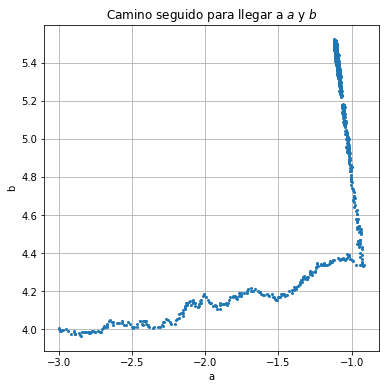

In [9]:
plt.figure(figsize = (6,6))
plt.plot(a_sample,b_sample, 'o', markersize = 2)
plt.xlabel('a')
plt.ylabel('b')
plt.title('Camino seguido para llegar a $a$ y $b$')
plt.grid('True')

In [10]:
len(a_sample)

1416

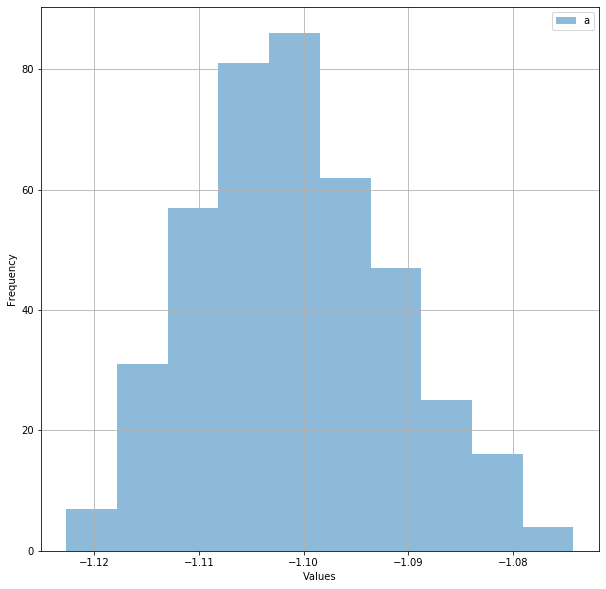

In [11]:
plt.figure(figsize = (10,10))
plt.hist(a_sample[1000: 2000], label = 'a',alpha=0.5);
plt.grid('True')
plt.xlabel('Values')
plt.legend()
plt.ylabel('Frequency');

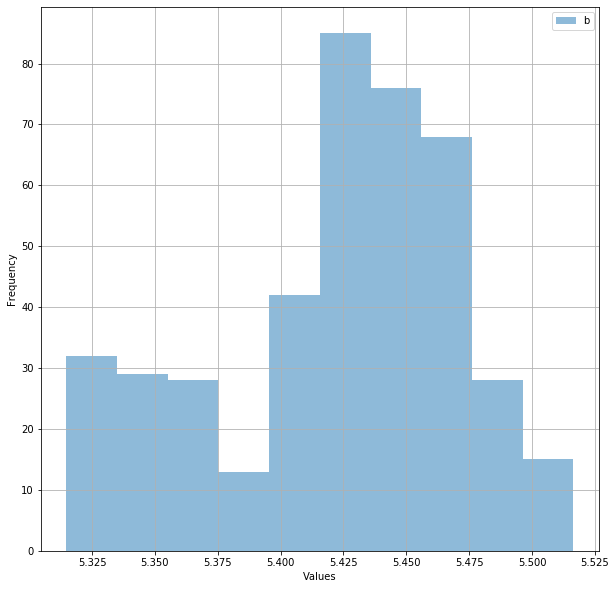

In [12]:
plt.figure(figsize = (10,10))
plt.hist(b_sample[1000: 2000], label = 'b',alpha=0.5);
plt.grid('True')
plt.xlabel('Values')
plt.legend()
plt.ylabel('Frequency');

2.-Grafica tu modelo contra los datos. ¿Qué tan bueno es el ajuste? ¿Cualitativamente? ¿Cuantitativamente?

Calculamos la mediana.

In [13]:
a_great = np.median(np.array(a_sample))
a_great

-1.101040341557637

In [14]:
b_great = np.median(np.array(b_sample))
b_great

5.379807760756721

In [15]:
x_new = np.linspace(0,10,100)
y_new = a_great*x_new + b_great

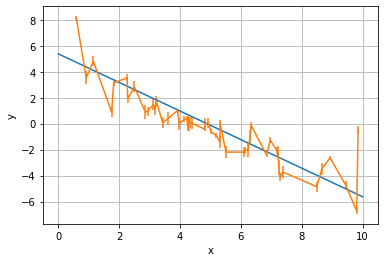

In [16]:
plt.plot(x_new, y_new)
plt.errorbar(x, y,yerr = yerror, markersize = 0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('True')

**Cualitativamente**: Se observa que se ajusta a los datos, ya que la pendiente y la ordenada hacen que la recta esté entre los datos. 

**Cuantitativamente**: ¿Cómo podemos expresar qué tan bien se ajustan nuestros datos a la recta?


Varios caminos:

In [81]:
a_total = []
b_total = []

sigma = 0.01
rango = 2500

for k in range(10):   
    a0 = np.random.normal(-2, 2, 10)
    b0 = np.random.normal(4, 2, 10)
    a_sample = [a0[k]]
    b_sample = [b0[k]]
    lnlike0 = -1*likelihood(a0[k], b0[k], [x,y,yerror])
    for j in range(1,rango):
        a_new = np.random.normal(a_sample[len(a_sample)-1], sigma)
        b_new = np.random.normal(b_sample[len(b_sample)-1], sigma)
        like = -1*likelihood(a_new, b_new, [x,y,yerror])
        if like>lnlike0:
            lnlike0 = like
            a_sample.append(a_new)
            b_sample.append(b_new)
        elif lnlike0-like<-math.log(random.uniform(0,1)):
            lnlike0 = like
            a_sample.append(a_new)
            b_sample.append(b_new)
    a_total.append(a_sample)
    b_total.append(b_sample)

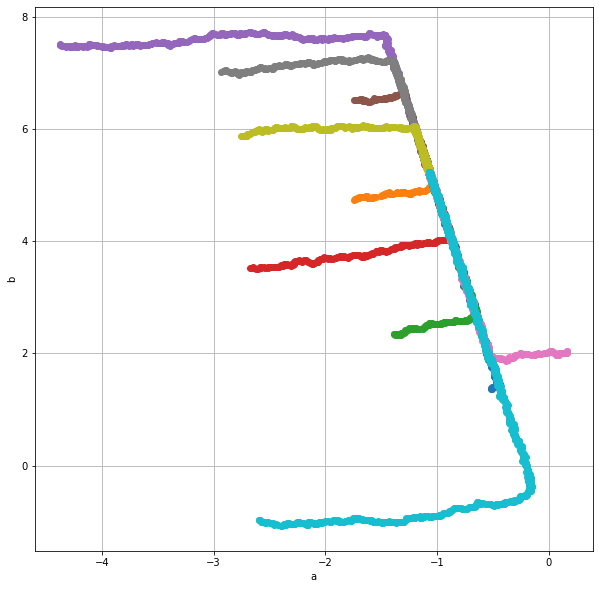

In [82]:
plt.figure(figsize = (10,10))
for i in range(10):
    plt.plot(a_total[i], b_total[i], 'o');
plt.grid('True')
plt.xlabel('a')
plt.ylabel('b');

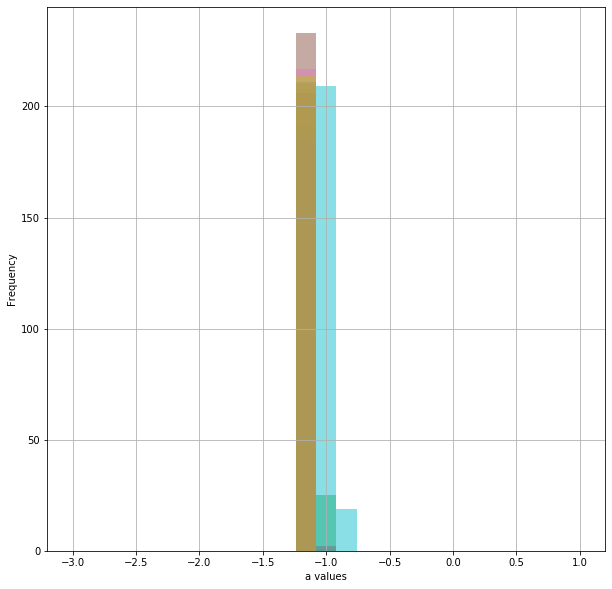

In [83]:
plt.figure(figsize = (10,10))
for i in range(10):
    plt.hist(a_total[i][950:2500], 25, range = (-3,1), alpha=0.5);

plt.grid('True')
plt.xlabel('a values')
plt.ylabel('Frequency');

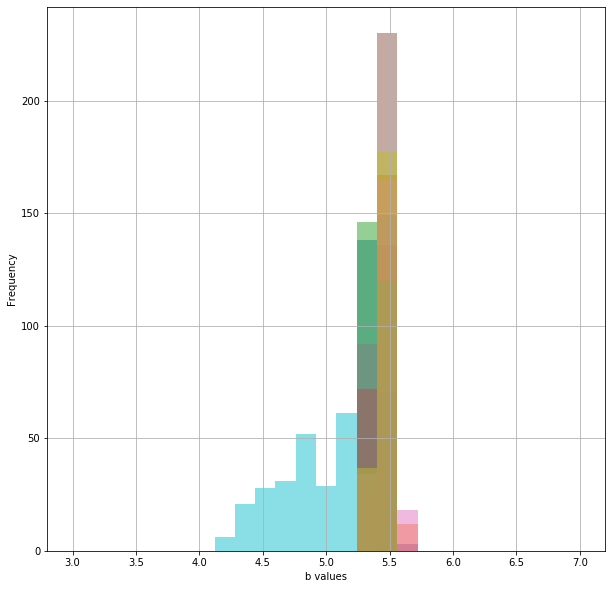

In [84]:
plt.figure(figsize = (10,10))
for i in range(10):
    plt.hist(b_total[i][950:2500], 25, range = (3,7), alpha=0.5);

plt.grid('True')
plt.xlabel('b values')
plt.ylabel('Frequency');

In [85]:
suma = 0
sumb = 0
for i in range(10):
    suma = suma + np.median(a_total[i])
    sumb = sumb + np.median(b_total[i])

In [86]:
suma/10

-1.0714470037736272

In [87]:
sumb/10

5.049715132254754

3.- Usa el método de Gelman-Rubin para determinar si tus cadenas han convergido.Referencia: https://arxiv.org/pdf/1812.09384.pdf 


In [102]:
n = 10
m = 500

def prom_x_i(x_it):
    return np.mean(x_it)

def prom_mu(x_i):
    sum = 0
    for i in range(n):
        sum = sum + prom_x_i(x_i[i])
    return sum/n

def s_i2(x_it):
    return np.std(x_it)

def s2(x_i):
    sum = 0
    for i in range(n):
        sum = sum + s_i2(x_i[i])
    return sum/n

def B_n(x_i):
    sum = 0
    for i in range(n):
        sum = sum + (prom_x_i(x_i[i])-prom_mu(x_i))**2
    return sum/(n-1)

def sigma_gorro2(x_i, m):
    return (m-1)*s2(x_i)/m + B_n(x_i)

def R(x_i, m):
    return math.sqrt(sigma_gorro2(x_i, m)/s2(x_i))

In [103]:
R(a_total, len(a_total[0]))

1.10020831994032

In [104]:
R(b_total, len(b_total[0]))

1.7239500236227252

**Nota:** Podríamos concluir que el parámetro $a$ es aceptable debido a Ra. Pero Rb no es tan bueno.

Cambiamos un poco nuestros códigos para mejorar Ra y Rb.

In [150]:
a_total = []
b_total = []

sigma = 0.01
rango = 2500

a0 = np.random.normal(-0.8, 1, 10)
b0 = np.random.normal(4, 0.5, 10)
for k in range(10):   
    a_sample = [a0[k]]
    b_sample = [b0[k]]
    lnlike0 = -1*likelihood(a0[k], b0[k], [x,y,yerror])
    for j in range(1,rango):
        a_new = np.random.normal(a_sample[len(a_sample)-1], sigma)
        b_new = np.random.normal(b_sample[len(b_sample)-1], sigma)
        like = -1*likelihood(a_new, b_new, [x,y,yerror])
        if like>lnlike0:
            lnlike0 = like
            a_sample.append(a_new)
            b_sample.append(b_new)
        elif lnlike0-like<-math.log(random.uniform(0,1)):
            lnlike0 = like
            a_sample.append(a_new)
            b_sample.append(b_new)
    a_total.append(a_sample)
    b_total.append(b_sample)

In [133]:
R(a_total, len(a_total[0]))

1.0124624570304168

In [134]:
R(b_total, len(b_total[0]))

1.0314298708636214

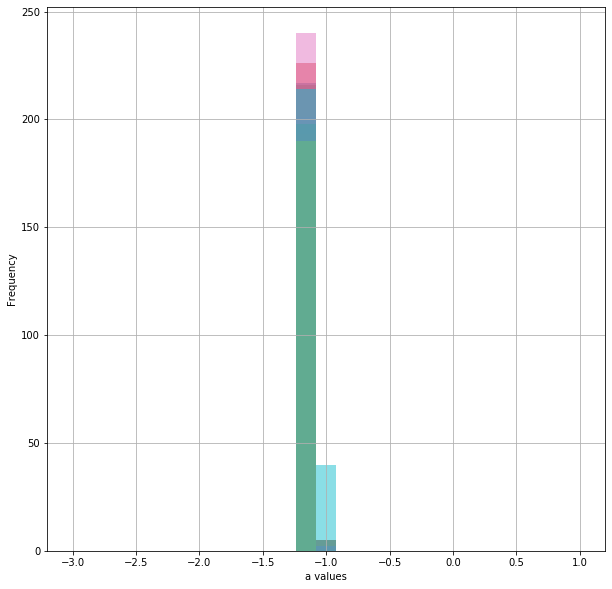

In [135]:
plt.figure(figsize = (10,10))
for i in range(10):
    plt.hist(a_total[i][950:2500], 25, range = (-3,1), alpha=0.5);

plt.grid('True')
plt.xlabel('a values')
plt.ylabel('Frequency');

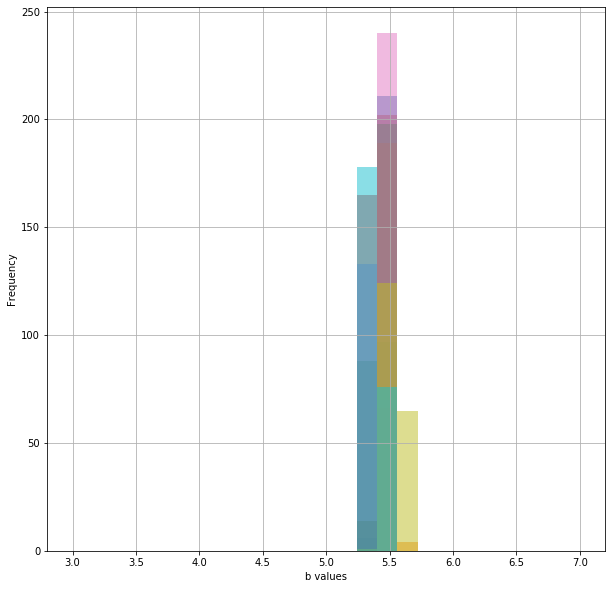

In [136]:
plt.figure(figsize = (10,10))
for i in range(10):
    plt.hist(b_total[i][950:2500], 25, range = (3,7), alpha=0.5);

plt.grid('True')
plt.xlabel('b values')
plt.ylabel('Frequency');

Quitamos el burning:

In [151]:
for i in range(10):
    a_total[i] = a_total[i][1000:2000]
    b_total[i] = b_total[i][1000:2000]

In [152]:
R(a_total, len(a_total[0]))

1.0002336269345387

In [153]:
R(b_total, len(b_total[0]))

1.0300273711975958

## **Agregamos un nuevo parámetro: parámetro de errores**

- Con un camino:

In [156]:
def function(x0, a0, b0):
    return a0*x0 + b0

def likelihood(a, b, f,data):
    equis = data[0]
    ye = data[1]
    yerr = data[2] 
    model = function(equis, a, b)
    likelihood_0 = (ye-model)**2/(yerr**2 + (f**2)*model**2)
    return likelihood_0.sum()

In [195]:
rango = 3000

a0 = -1
b0 = 4.0
f0 = 0.3
lnlike0 = -1*likelihood(a0, b0, f0,[x,y,yerror])

a_sample = [a0]
b_sample = [b0]
f_sample = [f0]

sigma = 0.01

for j in range(1,rango):
    a_new = np.random.normal(a_sample[len(a_sample)-1], sigma)
    b_new = np.random.normal(b_sample[len(b_sample)-1], sigma)
    f_new = np.random.normal(f_sample[len(f_sample)-1], sigma)
    like = -1*likelihood(a_new, b_new, f_new, [x,y,yerror])
    if a_new <= -0.45 and a_new >= -1.45 and b_new <= 4.5 and b_new >= 3.5 and f_new <= 1 and f_new >= 0.2:
        if like>lnlike0:
            lnlike0 = like
            a_sample.append(a_new)
            b_sample.append(b_new)
            f_sample.append(f_new)
        elif lnlike0-like<-math.log(random.uniform(0,1)):
            lnlike0 = like
            a_sample.append(a_new)
            b_sample.append(b_new)
            f_sample.append(f_new)

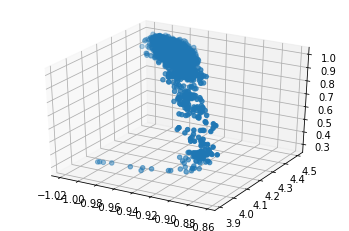

In [196]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')

ax1.scatter(a_sample, b_sample, f_sample)


(array([  6.,  13.,  25.,  41.,  38.,  40.,  59.,  79., 106.,  93.]),
 array([0.90185173, 0.91164702, 0.92144232, 0.93123761, 0.9410329 ,
        0.9508282 , 0.96062349, 0.97041878, 0.98021408, 0.99000937,
        0.99980466]),
 <a list of 10 Patch objects>)

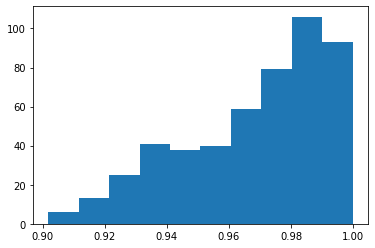

In [197]:
plt.hist(f_sample[1000:1500])

(array([ 67., 285., 453., 441., 315., 146.,  86.,  46.,  30.,  27.]),
 array([-1.01854448, -1.003053  , -0.98756152, -0.97207004, -0.95657855,
        -0.94108707, -0.92559559, -0.91010411, -0.89461262, -0.87912114,
        -0.86362966]),
 <a list of 10 Patch objects>)

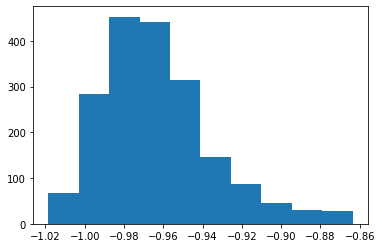

In [198]:
plt.hist(a_sample)

(array([ 39.,  32.,  45.,  67.,  65., 197., 299., 399., 482., 271.]),
 array([3.90795548, 3.96713739, 4.0263193 , 4.0855012 , 4.14468311,
        4.20386502, 4.26304693, 4.32222884, 4.38141075, 4.44059266,
        4.49977457]),
 <a list of 10 Patch objects>)

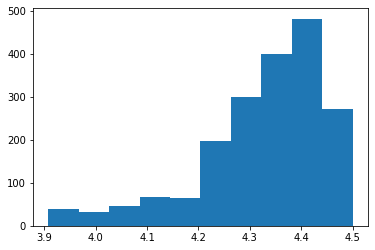

In [199]:
plt.hist(b_sample)

- Con varios caminos

In [245]:
a_total = []
b_total = []
f_total = []

sigma = 0.05
rango = 20000

for k in range(10):   
    a0 = np.random.normal(-0.5, 0.5, 10)
    b0 = np.random.normal(4, 0.5, 10)
    f0 = np.random.normal(0.3, 0.5, 10)
    a_sample = [a0[k]]
    b_sample = [b0[k]]
    f_sample = [f0[k]]
    lnlike0 = -1*likelihood(a0[k], b0[k], f0[k],[x,y,yerror])
    for j in range(1,rango):
        a_new = np.random.normal(a_sample[len(a_sample)-1], sigma)
        b_new = np.random.normal(b_sample[len(b_sample)-1], sigma)
        f_new = np.random.normal(f_sample[len(f_sample)-1], sigma)
        like = -1*likelihood(a_new, b_new, f_new, [x,y,yerror])
        if a_new <= -0.45 and a_new >= -1.45 and b_new <= 4.5 and b_new >= 3.5 and f_new <= 1 and f_new >= 0.0:
            if like>lnlike0:
                lnlike0 = like
                a_sample.append(a_new)
                b_sample.append(b_new)
                f_sample.append(f_new)
            elif lnlike0-like<-math.log(random.uniform(0,1)):
                lnlike0 = like
                a_sample.append(a_new)
                b_sample.append(b_new)
                f_sample.append(f_new)
    a_total.append(a_sample)
    b_total.append(b_sample)
    f_total.append(f_sample)

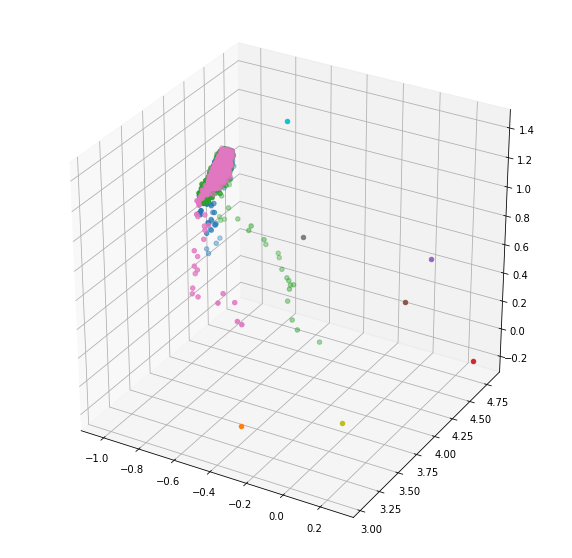

In [246]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111,projection='3d')

for i in range(10):
    ax1.scatter(a_total[i], b_total[i], f_total[i])

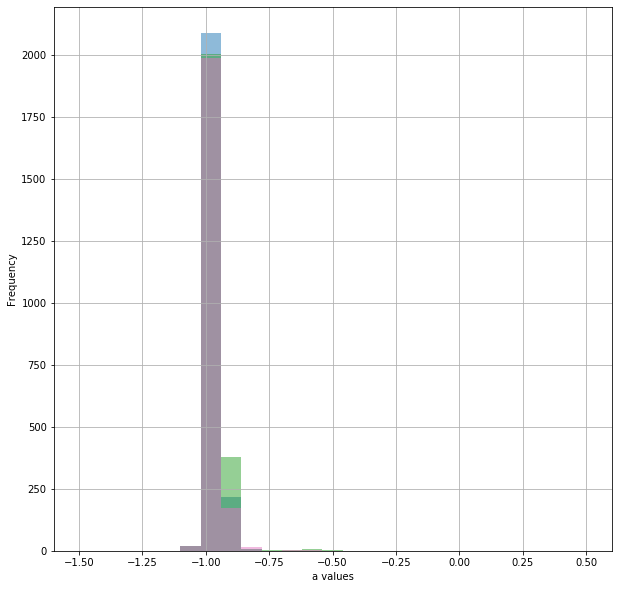

In [247]:
plt.figure(figsize = (10,10))
for i in range(10):
    plt.hist(a_total[i], 25, range = (-1.5, 0.5), alpha=0.5);

plt.grid('True')
plt.xlabel('a values')
plt.ylabel('Frequency');

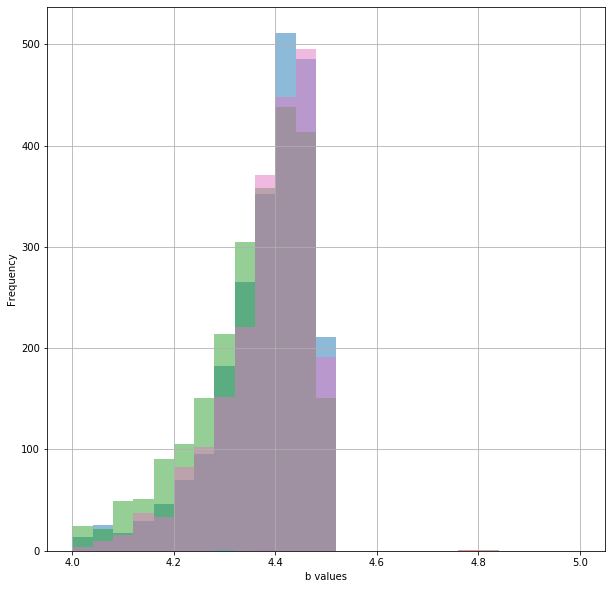

In [248]:
plt.figure(figsize = (10,10))
for i in range(10):
    plt.hist(b_total[i], 25, range = (4.0,5.0), alpha=0.5);

plt.grid('True')
plt.xlabel('b values')
plt.ylabel('Frequency');

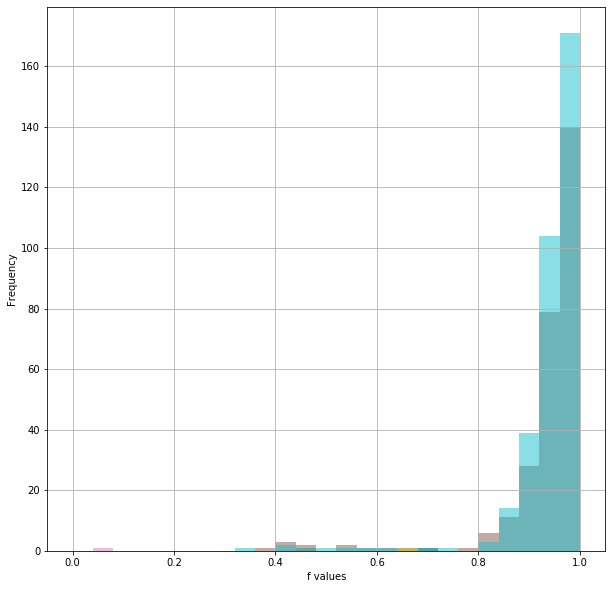

In [235]:
plt.figure(figsize = (10,10))
for i in range(10):
    plt.hist(f_total[i], 25, range = (0.0,1.0), alpha=0.5);

plt.grid('True')
plt.xlabel('f values')
plt.ylabel('Frequency');

Calculamos medianas quitando el burning.

In [239]:
a_total[1

[]

In [244]:
len(a_total[5])

277